<h1>Contexto - Introdução</h1>

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os
retornos de vendas gerados a partir desses investimentos.
Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e
**identificar os fatores que mais impactam** na geração de leads, a empresa
solicitou a análise de um especialista em dados. **Além disso, a empresa busca** 
**criar um modelo de predição** de valores para estimar o retorno de vendas que 
pode ser gerado a partir de um determinado investimento em publicidade.

In [2]:
# Importando módulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h1>Análise descritiva</h1>
Farei a importação dos dados, a visualização, e reparo, junto com o melhor entendimento.

**Bibliotecas utilizadas**: Pandas, seaborn, matplotlib e plotly. 

In [3]:
# Importando Base de dados
df =  pd.read_csv('MKT.csv', sep=',')
df.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [4]:
# Verificando informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [5]:
# Descrevendo a base
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


<Axes: xlabel='sales', ylabel='Count'>

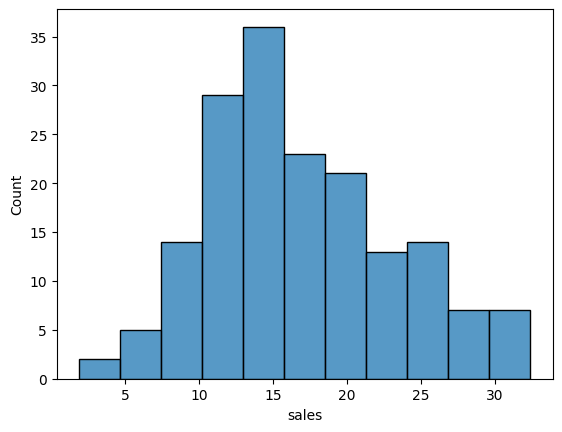

In [6]:
# Descrevendo Sales
sns.histplot(df['sales'])

In [7]:
# Descrevendo sales com boxplot
box1 = px.box(df, x='sales')
box1.update_traces(line_color='green')

Text(0.5, 1.0, 'Total Spend Ads')

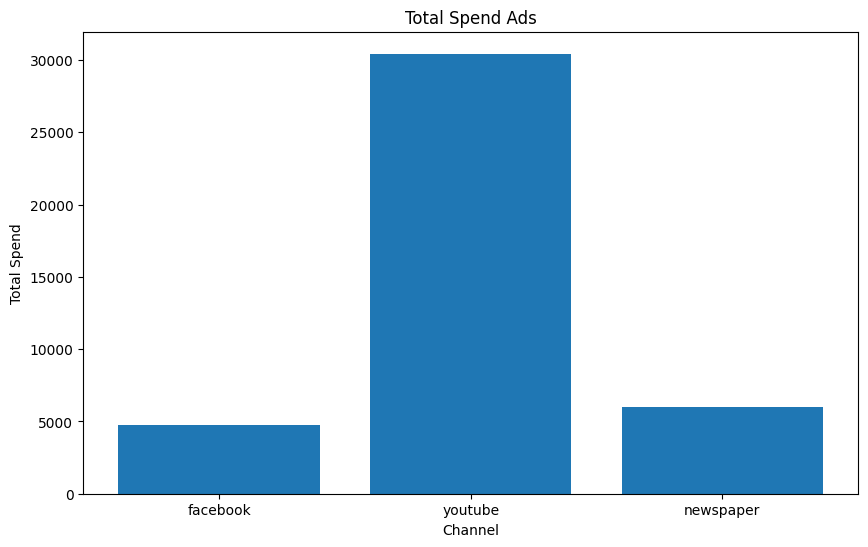

In [8]:
# Criando somas
facebook_sum = df['facebook'].sum()
youtube_sum = df['youtube'].sum()
newspaper_sum = df['newspaper'].sum()

# Comparando maiores gastos
fig = plt.figure(figsize=(10, 6)) 
plt.bar(['facebook', 'youtube', 'newspaper'], [facebook_sum, youtube_sum, 
                                               newspaper_sum])

plt.xlabel('Channel')
plt.ylabel('Total Spend')
plt.title('Total Spend Ads')

In [9]:
# Valores gastos por canal
print(f'Facebook: {facebook_sum}')
print(f'Youtube: {youtube_sum}')
print(f'Newspaper: {newspaper_sum}')

Facebook: 4731.84
Youtube: 30441.6
Newspaper: 6026.04


<h1>Análise exploratória</h1>

Analisarei correlações e identificarei outliers

**Bibliotecas utilizadas:** Pandas, seaborn, matplotlib e plotly

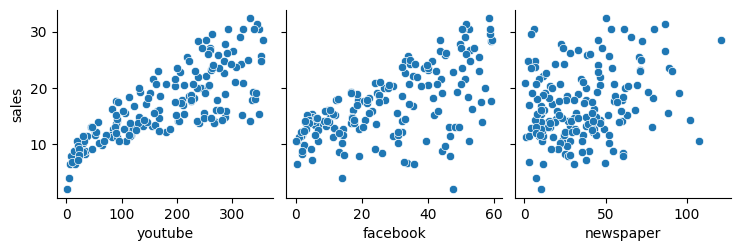

In [10]:
# Listando colunas
columns = df.columns.tolist()
columns.remove('sales')

# Verificando correlações
sns.pairplot(df, x_vars=columns, y_vars=['sales'])

In [11]:
# Verificando correlação com tabela
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

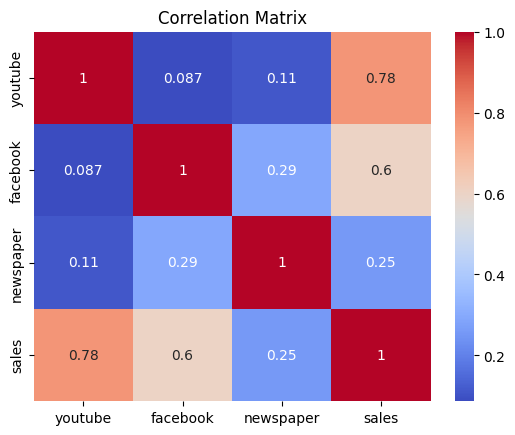

In [12]:
# Heatmap de correlação
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Linear Regression')

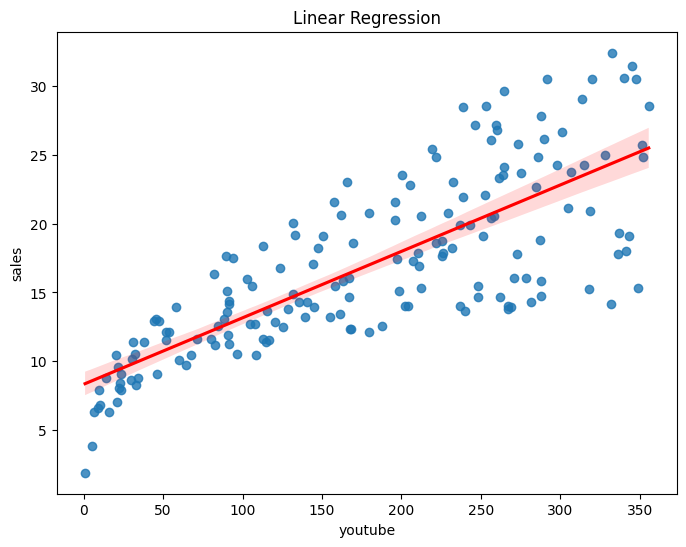

In [13]:
# Gráfico de regressão linear - youtube / sales
plt.subplots(figsize=(8, 6))

sns.regplot(
    x=df['youtube'],
    y=df['sales'],
    line_kws={'color': 'r'}
)

plt.title('Linear Regression')

Text(0.5, 1.0, 'Linear Regression')

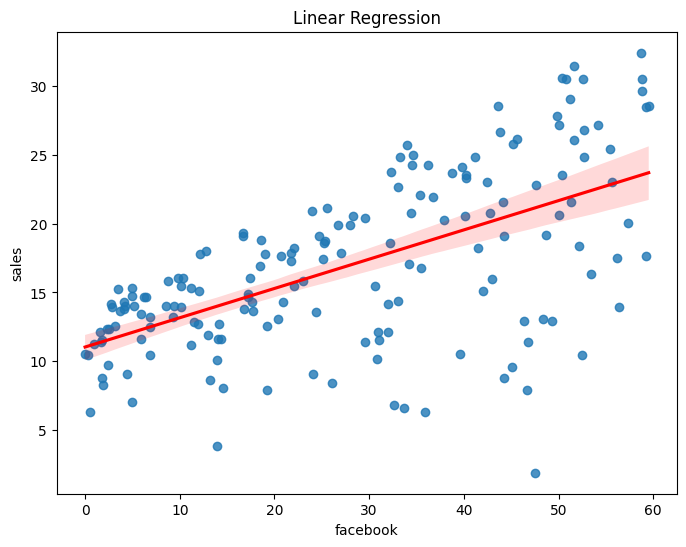

In [14]:
# Gráfico de regressão linear - facebook / sales
plt.subplots(figsize=(8, 6))

sns.regplot(
    x=df['facebook'],
    y=df['sales'],
    line_kws={'color': 'r'}
)

plt.title('Linear Regression')

<h1>Modelagem</h1>

Criação dos modelos de machine learning para predição de resultados.


In [15]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [16]:
# Separando variáveis - Explicativas (X) e base (y)
X = df[['youtube', 'facebook', 'newspaper']]

y = df[['sales']]

In [17]:
# Criando as bases de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    test_size=0.3,
                                                    random_state=42)

In [18]:
# Imprimindo tamanho das bases
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [19]:
# Treinando o modelo 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predição na base de teste
y_pred = lm.predict(X_test)

In [21]:
# Predição de acerto com r²

r = r2_score(y_test, y_pred)

print(f'r² =', r)

r² = 0.882423505618885


<h1>Calculando predição</h1>

Insira os valores desejados para realizar os cálculos de predição


In [45]:
# Inserindo valor a ser calculado 

youtube = float(input(f'Enter the budget amount for YouTube: '))
facebook = float(input(f'Enter the budget amount for Facebook: '))
newspaper = float(input(f'Enter the budget amount for Newspaper: '))
soma = youtube + facebook + newspaper

valor = pd.DataFrame([[youtube, facebook, newspaper]], columns=['youtube',
                      'facebook', 'newspaper'])

sale_predict = lm.predict(valor)

# Prints de valores
print(f'Investing US${youtube:.2f} in youtube.\n'
      f'Investing US${facebook:.2f} in facebook.\n'
      f'Investing US${newspaper:.2f} in newspaper.\n'
      f'A total of US${soma:.2f}')

print('With the amounts invested we will have a return of'
        f' US${sale_predict[0][0]:.2f}')


Investing US$1598.00 in youtube.
Investing US$1312.00 in facebook.
Investing US$90.00 in newspaper.
A total of US$3000.00
With the amounts invested we will have a return of US$322.65


<h1>Conclusão</h1>

<h3>A previsão é que teremos o melhor retorno com ads no facebook.</h3>

<p>Investindo US$1000 em ads o Youtube temos a previsão de US$48.88 em vendas</p>
<p>Investindo US$1000 em ads o Facebook temos a previsão de US$191.73 em vendas</p>
<p>Investindo US$1000 em ads o Newspaper temos a previsão de US$3.53 em vendas</p>